In [1]:
#Set up google colab working environment
%cd ~/../content
%rm -rf Colombian-peso-counterfeit-detection
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git 
%cd /content/Colombian-peso-counterfeit-detection/Code  

/content
Cloning into 'Colombian-peso-counterfeit-detection'...
remote: Enumerating objects: 21450, done.
remote: Counting objects: 100% (485/485), done.
remote: Compressing objects: 100% (236/236), done.
remote: Total 21450 (delta 300), reused 414 (delta 247), pack-reused 20965
Receiving objects: 100% (21450/21450), 446.57 MiB | 49.18 MiB/s, done.
Resolving deltas: 100% (394/394), done.
Updating files: 100% (62422/62422), done.
/content/Colombian-peso-counterfeit-detection/Code


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import common_functions as cf
from sklearn.cluster import MiniBatchKMeans

In [3]:
def NormalizeImage(image, label):
    # Normalize pixel values to be between 0 and 1
    return tf.cast(image, tf.float32) / 255.0, label

In [4]:
def ReshapeImage(x, y):
    print(x.shape, len(x))
    return (tf.reshape(x,[32 * x.shape[1] * x.shape[2], 3]), y)

In [11]:
def TrainNewModel(dataset, class_names):
    kmeans = MiniBatchKMeans(n_clusters=len(class_names))
    i = 0
    for image_batch,_ in dataset:
        image_batch = tf.reshape(image_batch, [image_batch.shape[0] * image_batch.shape[1] * image_batch.shape[2], 3])
        if i % 100 == 0:
            print(i)
        if image_batch.numpy().shape[0] != 29491200:
             continue
        kmeans.partial_fit(image_batch)
        i += 1

    print("done")
    return kmeans

In [6]:
def EvaluateModel(model, dataset):
    correct = 0
    total = 0
    i = 0
    for image_batch, label_batch in dataset:
        image_batch = tf.reshape(image_batch, [image_batch.shape[0] * image_batch.shape[1] * image_batch.shape[2], 3])
        if i % 100 == 0:
            print(i)
        correct += len([i for i, j in zip(label_batch, model.predict(image_batch)) if i == j])
        total += len(label_batch)
        i += 1

    print("Accuracy:", correct/total)

# Mini Batch K-Means

Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


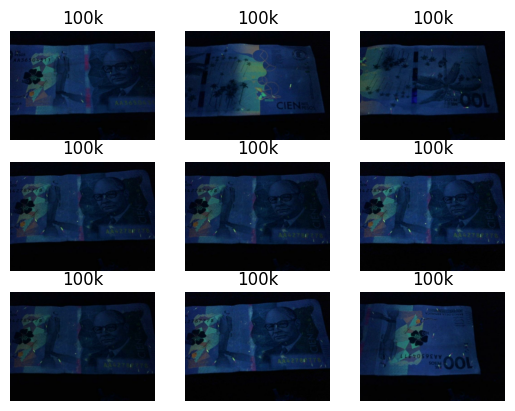

In [15]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData(shuffle = True)
cf.PeakData(train_ds, class_names)

In [17]:
#Shuffle dataset so it has a consistent order
batch_size = 32
shuffle_buffer_size = 10000
num_epochs = 1
train_ds = train_ds.shuffle(shuffle_buffer_size).repeat(num_epochs).batch(batch_size)
validation_ds = validation_ds.shuffle(shuffle_buffer_size).repeat(num_epochs).batch(batch_size)
test_ds = test_ds.shuffle(shuffle_buffer_size).repeat(num_epochs).batch(batch_size) 

In [18]:
kmeans = TrainNewModel(
    train_ds,
    class_names
)

InvalidArgumentError: ignored

array([ 3, 12,  2, 10,  4, 11,  6,  1,  5,  8,  7,  0,  9], dtype=int32)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


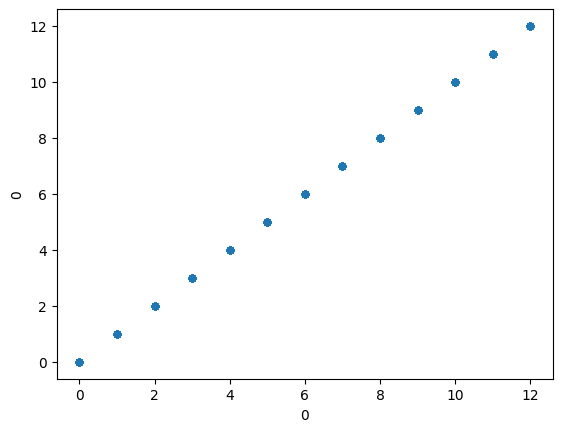

In [ ]:
for image_batch, label_batch in train_ds.take(1):
    image_batch = tf.reshape(image_batch, [image_batch.shape[0] * image_batch.shape[1] * image_batch.shape[2], 3])
    colors = np.array(image_batch)/256 # colors need to be (r,b,g) tuple in the range of 0-1

    # fig = plt.figure()
    # for i,v in enumerate(image_batch):
    #     ax = fig.add_subplot(111, projection="3d")
    #     ax.scatter(v[0], v[1], v[2], color=colors[i])
    # plt.show()

    hist = kmeans.predict(image_batch)
    display(pd.DataFrame(hist)[0].unique())
    pd.DataFrame(hist).plot(x=0, y=0, kind='scatter')
    plt.show()

In [ ]:
EvaluateModel(
    kmeans,
    test_ds
)


0
100


KeyboardInterrupt: ignored

# Normalized

In [ ]:
kmeans_normalized = TrainNewModel(
    train_ds.map(NormalizeImage),
    class_names
)

In [ ]:
EvaluateModel(
    kmeans_normalized,
    test_ds.map(NormalizeImage)
)

In [ ]:
def Foo(x, y):
    print([tf.shape(x)[k] for k in range(4)])
    return x,y # tf.reshape(tf.squeeze(x), [x.shape[1] * x.shape[2], 3])

for i,_ in train_ds.map(Foo).take(1): #.flat_map(tf.data.Dataset.from_tensor_slices).flat_map(tf.data.Dataset.from_tensor_slices).take(1):
    i = tf.reshape(i, [i.shape[0] * i.shape[1] * i.shape[2], 3])
    print(i)